In [1]:
import pandas as pd 
import os
import json
import numpy as np 

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./fraud_oracle.csv')
all_data = df.copy()

In [3]:
age_groups = {
    '16-17': 'Young',
    '18-20': 'Young',
    '21-25': 'Young',
    '26-30': 'Young',
    '31-35': 'Middle-aged',
    '36-40': 'Middle-aged',
    '41-50': 'Middle-aged',
    '51-65': 'Senior',
    '65+': 'Senior'
}
all_data['AgeGroup'] = all_data['AgeOfPolicyHolder'].map(age_groups)
all_data.drop(columns=['AgeOfPolicyHolder'], inplace=True)


def categorize_range(value):
    if value == 'less than 20000':
        return 'low'
    elif value in ['20000 to 29000', '30000 to 39000']:
        return 'mid'
    elif value in ['40000 to 59000', '60000 to 69000', 'more than 69000']:
        return 'high'
    else:
        return 'mid'


all_data['VehiclePrice_Cat'] = all_data['VehiclePrice'].apply(categorize_range)


In [4]:

label_encoder = LabelEncoder()


col_ordering = [
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':3,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}},
    {'col':'VehiclePrice','mapping':{'more than 69000':5,'20000 to 29000':1,'30000 to 39000':2,'less than 20000':0,
                                     '40000 to 59000':3,'60000 to 69000':4}},
    {'col':'AgeOfVehicle','mapping':{'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4, '6 years': 5, '7 years': 6, 'more than 7': 7}},
    {'col':'Year','mapping': {1994: 0, 1995: 1, 1996: 2}},
    {'col':'Days_Policy_Accident','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30': 4}},
    {'col':'Days_Policy_Claim','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30':4 }},
    {'col':'AddressChange_Claim','mapping': {'1 year': 1, 'no change': 0, '4 to 8 years': 4, '2 to 3 years': 2, 'under 6 months': 0.5}},
    {'col':'AgeGroup','mapping': {'Young': 0, 'Middle-aged': 1, 'Senior': 2}},
    {'col':'VehiclePrice_Cat','mapping': {'high': 2, 'mid': 1, 'low': 0}},
    {'col':'NumberOfCars','mapping': {'3 to 4': 3, '1 vehicle': 1, '2 vehicles': 2, '5 to 8': 7, 'more than 8': 9}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

all_data = ord_encoder.fit_transform(all_data)




for col in all_data.columns:
    if all_data[col].dtype == 'object':
        all_data[col] = label_encoder.fit_transform(all_data[col])



c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downc

In [5]:
all_data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat
0,2,5,6,6,1,6,5,1,0,2,...,0,0,0,0,1,3,0,2,-1.0,2
1,4,3,6,6,1,2,5,4,1,2,...,1,0,0,0,0,1,0,1,-1.0,2
2,10,5,0,6,1,5,10,2,1,1,...,0,0,0,0,0,1,0,1,-1.0,2
3,6,2,2,17,0,1,6,1,1,1,...,1,0,0,6,0,1,0,2,-1.0,1
4,4,5,1,6,1,6,4,2,0,2,...,0,0,0,0,0,1,0,1,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,0,0,0,0,0,1,2,1,-1.0,1
15416,9,5,4,13,1,1,3,1,1,1,...,0,0,0,6,0,3,2,2,-1.0,1
15417,9,5,4,17,0,1,3,1,1,2,...,0,0,0,1,0,1,2,1,-1.0,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,0,0,6,0,1,2,0,-1.0,1


In [6]:
df.rename(columns = {'FraudFound_P':'Fraud'},inplace = True)
all_data.rename(columns = {'FraudFound_P':'Fraud'},inplace = True)

In [77]:
def split_random_(df):

    x_1, x_2 = train_test_split(df[df.Fraud == 1], test_size=0.03, random_state=3)
    x_3, x_4 = train_test_split(df[df.Fraud == 0 ], test_size = 0.6, random_state=33)
    data_1 = pd.concat([x_1,x_3])
    data_2 = pd.concat([x_2, x_4])
    return data_1, data_2


In [8]:
X, y = all_data.drop(columns='Fraud'), all_data.Fraud

In [9]:
X_, X_test_glob, y_, y_test_glob = train_test_split(X, y, test_size=0.2, random_state=11)

In [10]:
smote = SMOTE(random_state=12)
scaler = MinMaxScaler()

In [49]:
X_test = scaler.transform(X_test_glob)

In [ ]:
X_scale = scaler.fit_transform(X_)
X_train_smote, y_train_smote = smote.fit_resample(X_scale, y_)





In [14]:
model_1 = LogisticRegression(max_iter=300)

In [17]:
model_1.coef_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [28]:
def add_(listik, value):
    for i in range(1,51):
        listik.append(value)
    return listik


L, roc, acc, f1  = 0.5393789661607953, 0.7618739315462117, 0.6254863813229572, 0.21906693711967545

losses, roc_auc_s, accuracy_s, f1_s = add_(list(), L), add_(list(), roc), add_(list(), acc), add_(list(), f1) 


In [ ]:
json_file_path = './results/metrics.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)


global_model_metrics = {
    "losses": losses,
    "ROC_AUCs": roc_auc_s,
    "ACCURACYs": accuracy_s,
    "F1s": f1_s
}


data["global_model"] = [global_model_metrics]


with open(json_file_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Результаты глобального обучения успешно добавлены в JSON файл.")

* Global model train

In [11]:
X_1, X_2, y_1, y_2 = train_test_split(X_, y_, test_size=0.5, random_state=22)

In [23]:
def preparation(X, y):
    X_train_1_scale = scaler.fit_transform(X)
    X_train_1, y_train_1 = smote.fit_resample(X_train_1_scale, y)

    return X_train_1, y_train_1

In [24]:
def fit_predict(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=100)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    return  log_loss(y_test, y_pred_proba), roc_auc_score(y_test, y_pred_proba), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)
    


In [18]:
loss_1, roc_auc_1, accuracy_1, f1_1 = fit_predict(X_train_1, X_test, y_train_1, y_test_glob)

In [19]:
(loss_1, roc_auc_1, accuracy_1, f1_1)

(0.550586282857652, 0.7791237769614083, 0.6248378728923476, 0.2187711006076975)

In [25]:
X_train_2, y_train_2 = preparation(X_2, y_2) 

In [26]:
loss_2, roc_auc_2, accuracy_2, f1_2 = fit_predict(X_train_2, X_test, y_train_2, y_test_glob)

In [27]:
(loss_2, roc_auc_2, accuracy_2, f1_2)

(0.5627955715203258,
 0.7862219474047938,
 0.6271076523994812,
 0.22402159244264508)

In [29]:
loss_1_, roc_auc_1_, accuracy_1_, f1_1_ = add_(list(),loss_1 ), add_(list(),roc_auc_1), add_(list(),accuracy_1), add_(list(),f1_1)

In [34]:
loss_2_, roc_auc_2_, accuracy_2_, f1_2_ = add_(list(),loss_2 ), add_(list(),roc_auc_2), add_(list(),accuracy_2), add_(list(),f1_2)

In [35]:
len(loss_2_)


50

In [38]:
json_file_path = './IID_m.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)


local_model_1 = {
    "losses": loss_1_,
    "ROC_AUCs": roc_auc_1_,
    "ACCURACYs": accuracy_1_,
    "F1s": f1_1_
}


data["local_model_1"] = [local_model_1]


with open(json_file_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Результаты глобального обучения успешно добавлены в JSON файл.")

Результаты глобального обучения успешно добавлены в JSON файл.


In [39]:
json_file_path = './IID_m.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)


local_model_2 = {
    "losses": loss_2_,
    "ROC_AUCs": roc_auc_2_,
    "ACCURACYs": accuracy_2_,
    "F1s": f1_2_
}


data["local_model_2"] = [local_model_2]


with open(json_file_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Результаты глобального обучения успешно добавлены в JSON файл.")

Результаты глобального обучения успешно добавлены в JSON файл.


In [12]:
df1 = pd.concat([X_1, y_1],axis=1)
df2 = pd.concat([X_2, y_2],axis=1)


Fraud
0    5794
1     374
Name: count, dtype: int64


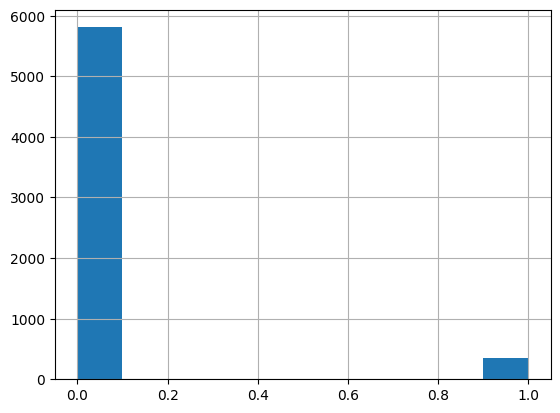

In [13]:
df1.Fraud.hist()
print(df2.Fraud.value_counts())

Fraud
0    5809
1     359
Name: count, dtype: int64


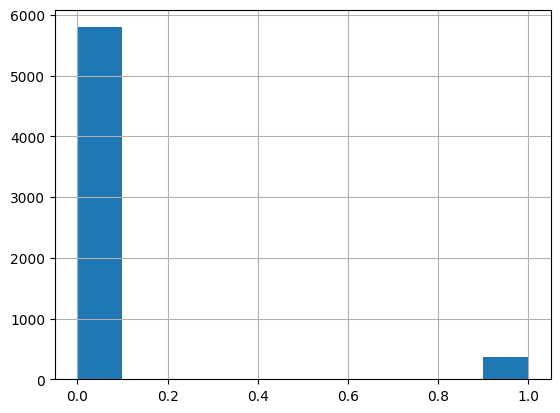

In [14]:
df2.Fraud.hist()
print(df1.Fraud.value_counts())

In [17]:
# data_1.to_csv('df_1.csv', index=False)
# data_2.to_csv('df_2.csv', index=False)


In [18]:
glob_data_test = pd.concat([X_test_glob, y_test_glob], axis=1)
glob_data_test.to_csv('test_glob.csv', index=False)

In [48]:
df1.to_csv('IID_df_1.csv', index=False)
df2.to_csv('IID_df_2.csv', index=False)

In [78]:
df_for_clients = pd.concat([X_, y_], axis=1)

data1, data2 = split_random_(df_for_clients)

In [79]:
X_train_1,  y_train_1 = data1.drop(columns='Fraud'), data1.Fraud
X_train_2, y_train_2 = data2.drop(columns='Fraud'), data2.Fraud

In [80]:
X_scale_1 = scaler.fit_transform(X_train_1)
X_train_1_, y_train_1_ = smote.fit_resample(X_scale_1, y_train_1)

In [81]:
loss_1, roc_auc_1, accuracy_1, f1_1 = fit_predict(X_train_1_, X_test, y_train_1_, y_test_glob)

In [82]:
(loss_1, roc_auc_1, accuracy_1, f1_1)

(0.5655761084543522, 0.7855344996908302, 0.6138132295719845, 0.225113858165257)

In [83]:
X_scale_2 = scaler.fit_transform(X_train_2)
X_train_2_, y_train_2_ = smote.fit_resample(X_scale_2, y_train_2)

In [84]:
loss_2, roc_auc_2, accuracy_2, f1_2 = fit_predict(X_train_2_, X_test, y_train_2_, y_test_glob)
(loss_2, roc_auc_2, accuracy_2, f1_2)

(0.43823600842632604,
 0.7382097261121012,
 0.7973411154345007,
 0.19146183699870634)

In [88]:
roc_mean = (0.7382097261121012 + 0.7855344996908302)/2
loss_mean = (0.43823600842632604 + 0.5655761084543522)/2
accuracy_mean = (0.6573411154345007+ 0.6138132295719845)/2
f1_mean = (0.19146183699870634 + 0.225113858165257)/2

In [89]:
(roc_mean, loss_mean, accuracy_mean, f1_mean)

(0.7618721129014657,
 0.5019060584403392,
 0.6355771725032426,
 0.20828784758198166)

In [90]:
loss_1_, roc_auc_1_, accuracy_1_, f1_1_ = add_(list(),loss_1 ), add_(list(), roc_auc_2), add_(list(),accuracy_1), add_(list(),f1_2)

In [91]:
json_file_path = './Non_iid_m.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)


local_model_1 = {
    "losses": loss_1_,
    "ROC_AUCs": roc_auc_1_,
    "ACCURACYs": accuracy_1_,
    "F1s": f1_1_
}


data["local_model_1"] = [local_model_1]


with open(json_file_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Результаты глобального обучения успешно добавлены в JSON файл.")

Результаты глобального обучения успешно добавлены в JSON файл.


Fraud
0    11603
1      733
Name: count, dtype: int64


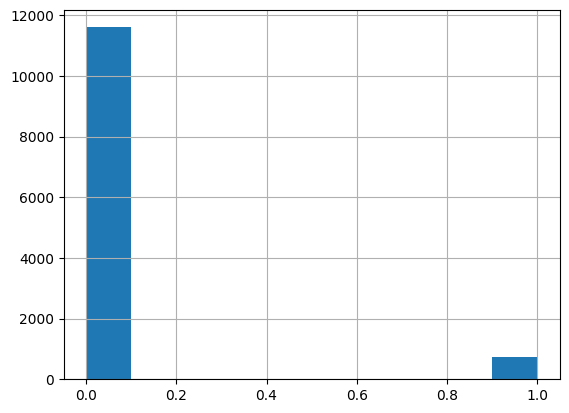

In [16]:
df_for_clients.Fraud.hist()
print(df_for_clients.Fraud.value_counts())

<Axes: >

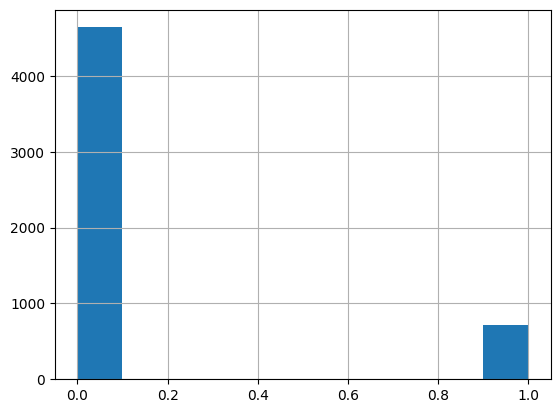

In [85]:
data1.Fraud.hist()

<Axes: >

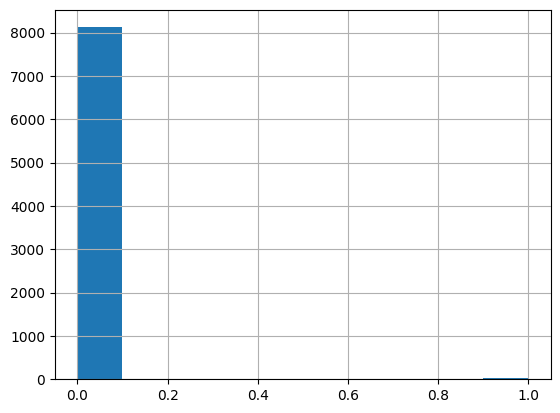

In [65]:
data2.Fraud.hist()

Fraud
0    4641
1     711
Name: count, dtype: int64


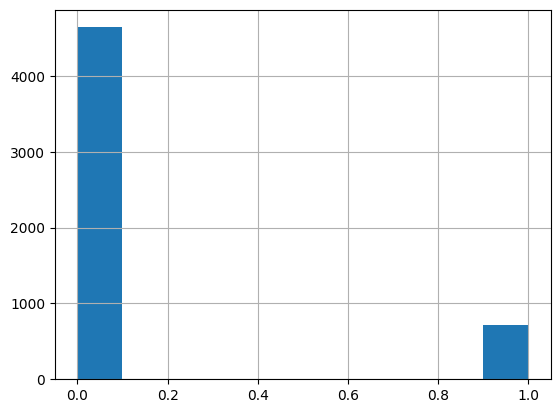

In [86]:
data1.Fraud.hist()
print(data1.Fraud.value_counts())

Fraud
0    6962
1      22
Name: count, dtype: int64


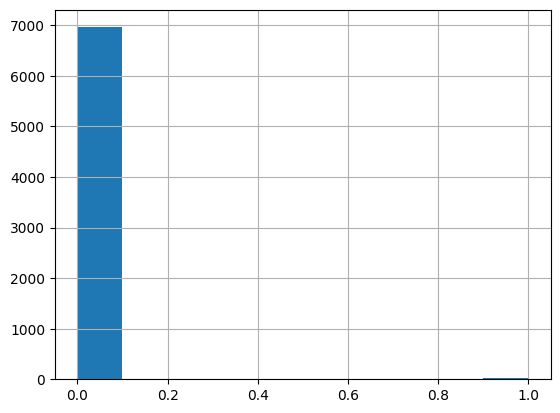

In [87]:
data2.Fraud.hist()
print(data2.Fraud.value_counts())

In [24]:
data1.to_csv("Non_IID_1.csv", index=False)
data2.to_csv("Non_IID_2.csv", index=False)

In [17]:
8123 + 3480

11603